In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [8]:
df = pd.read_csv("summer.csv")
len(df)

31165

In [5]:
df.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [7]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

**1. In how many cities Summer Olympics is held so far?** 

In [15]:
cntry = df["Country"].unique()
cntry

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

In [16]:
print("The number of cities in which Summer Olympics is held so far is: ", len(cntry))

The number of cities in which Summer Olympics is held so far is:  148


**2.Which sport is having most number of Gold Medals so far?(Top 5)**

In [22]:
medals = []
for medal in df["Medal"].unique():
  medals.append([medal ,len(df[df["Medal"] == medal])])
medals

[['Gold', 10486], ['Silver', 10310], ['Bronze', 10369]]

In [33]:
m = df[df["Medal"] == "Gold"] #dataframe consisting of rows with only gold medal
gold_medal = []
for sport in df["Sport"].unique():
  gold_medal.append([sport, len(m[m["Sport"] == sport])])
gold_medal = pd.DataFrame(gold_medal, columns = ['Sport', 'Medals']).sort_values(by = "Medals", ascending = False).head()
gold_medal

,Sport,Medals
0,Aquatics,1421
1,Athletics,1215
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


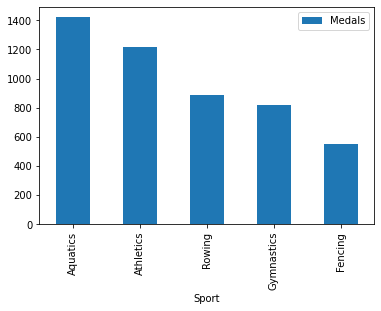

In [34]:
gold_medal.plot(x = "Sport", y = "Medals", kind = "bar")

**3.Which sport is having most number of medals so far?(Top 5)**

In [37]:
total_medals = []
for tm in df["Sport"].unique():
  total_medals.append([tm, len(df[df["Sport"] == tm])])
total_medals = pd.DataFrame(total_medals, columns = ["Sport", "Total Medals"]).sort_values(by = "Total Medals", ascending = False).head()
total_medals


,Sport,Total Medals
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


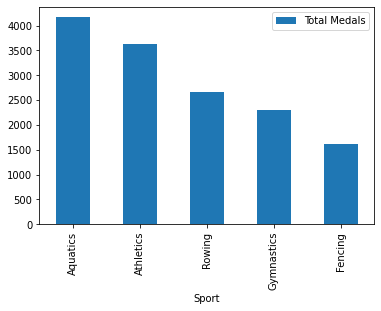

In [38]:
total_medals.plot(x = "Sport", y = "Total Medals", kind = "bar")

**4.Which player has won most number of medals?(Top 5)**

In [48]:
athlete = []
for at in df['Athlete'].unique():
    athlete.append([at, len(df[df['Athlete'] == at])])
athlete = pd.DataFrame(athlete, columns = ['Player Name', 'Total Medals']).sort_values(by = 'Total Medals', ascending = False).head()
athlete

,Player Name,Total Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


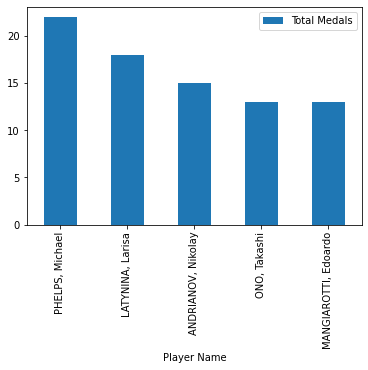

In [47]:
athlete.plot(x = "Player Name", y = "Total Medals", kind = "bar")

**5.Which player has won most number of Gold medals?(Top 5)**

In [49]:
m = df[df["Medal"] == "Gold"]
player_gold = []
for at in m['Athlete'].unique():
    player_gold.append([at, len(m[m['Athlete'] == at])])
player_gold = pd.DataFrame(player_gold, columns = ['Player Name', 'Gold Medals']).sort_values(by = "Gold Medals", ascending = False).head()
player_gold

,Player Name,Gold Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


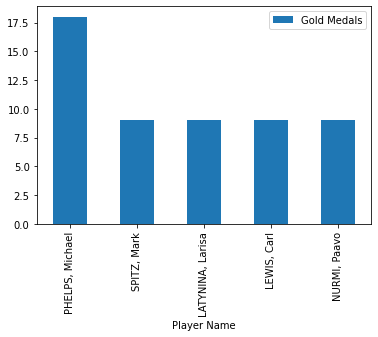

In [50]:
player_gold.plot(x = "Player Name", y = "Gold Medals", kind = "bar")

**6.In which year India won first Gold Medal in Summer Olympics?**

In [55]:
m = df[df["Medal"] == "Gold"]
country = m[m["Country"] == "IND"]
country.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


In [59]:
print("The year in which India won first Gold Medal in Summer olympics is: ",country["Year"].iloc[0])

The year in which India won first Gold Medal in Summer olympics is:  1928


**7.Which event is most popular in terms of number of players?(Top 5)**

In [60]:
event = []
for et in df['Event'].unique():
    event.append([et, len(df[df['Event'] == et])])
event = pd.DataFrame(event, columns = ['Event Name', 'Total Players']).sort_values(by = 'Total Players', ascending = False).head()
event

,Event Name,Total Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


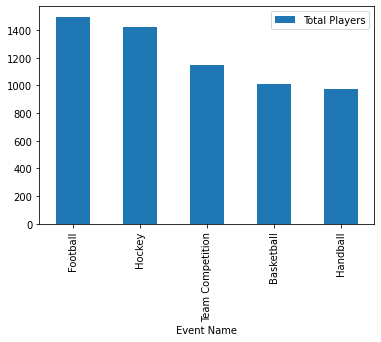

In [62]:
event.plot(x = "Event Name", y = "Total Players", kind = "bar")

**8.Which sport is having most female Gold Medalists?(Top 5)**

In [66]:
m = df[df["Medal"] == "Gold"]
f = m[m["Gender"] == "Women"]
female_gold = []
for fg in f["Sport"].unique():
  female_gold.append([fg, len(f[f["Sport"] == fg])])

female_gold = pd.DataFrame(female_gold, columns = ["Sport", "Total Medals"]).sort_values(by = "Total Medals", ascending = False).head()
female_gold

,Sport,Total Medals
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


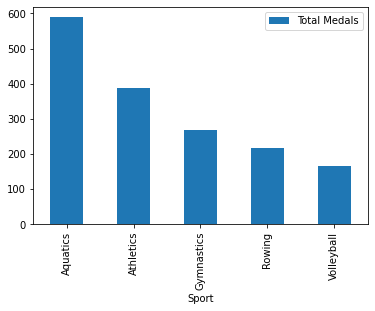

In [67]:
female_gold.plot(x = "Sport", y = "Total Medals", kind = "bar")